In [ ]:
cd D:\ArdenDocs\Modules\Data Handling and Decision Making\Datasets

D:\ArdenDocs\Modules\Data Handling and Decision Making\Datasets


In [ ]:
pwd

'D:\\ArdenDocs\\Modules\\Data Handling and Decision Making\\Datasets'

# Insurance Data

## Author = Tahir HussIN
## Update = 14/03/2024



### Data Exploration and Cleaning

1. **Load the Data**
        - Load the insurance dataset into a pandas DataFrame
2. **Initial Inspection**
    - Display the first few rows of the Dataset
    - Check for missing values and handle them if necessary

### Summary Statistics

3. **Summary Statistics**
    - Display summary statistics for the numerical columns
4. **Distribution of variables**
    - Explore unique values in categorical columns by value counts


## Import Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

from math import sqrt
from pprint import pprint
from IPython.display import display
from scipy.spatial import ConvexHull
from matplotlib.pyplot import figure

from sklearn.preprocessing import LabelEncoder as label_encoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV, cross_val_predict
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split,RandomizedSearchCV


import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [ ]:
df = pd.read_csv("insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#Check for the missing values
missing_values = df.isnull().sum()
print("The Number of the missing values:\n", missing_values)

print("*"*30)
#Checking for the statistical summary
print("Statistical Check:\n")
print(df.describe().T)
print("*"*30)

#Checking for the uniques values in the category columns
age_unique = df["age"].unique()
sex_unique = df["sex"].unique()
children_unique = df["children"].unique()
region_unique = df["region"].unique()

print("Age unique: ", age_unique)
print("Sex unique: ", sex_unique)
print("Children unique: ", children_unique)
print("Region unique: ", region_unique)

The Number of the missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
******************************
Statistical Check:

           count          mean           std        min         25%       50%  \
age       1338.0     39.207025     14.049960    18.0000    27.00000    39.000   
bmi       1338.0     30.663397      6.098187    15.9600    26.29625    30.400   
children  1338.0      1.094918      1.205493     0.0000     0.00000     1.000   
charges   1338.0  13270.422265  12110.011237  1121.8739  4740.28715  9382.033   

                   75%          max  
age          51.000000     64.00000  
bmi          34.693750     53.13000  
children      2.000000      5.00000  
charges   16639.912515  63770.42801  
******************************
Age unique:  [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
Sex unique:  ['fema

Checking for duplicate values

In [ ]:
df.duplicated().sum()

1

Dropping duplicate values in the dataframe

In [ ]:
df.drop_duplicates(inplace=True)

Double check for duplicate values to make sure that they are removed

In [ ]:
df.duplicated().sum()

0

In [ ]:
#Checking for data types

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [ ]:
#Checking for the sample datatype
first_row = df.head()

for column in first_row.columns:
    column_values = first_row[column]
    value = column_values.values[0]
    #value_type = type(value).__name__
    print(f"column_values: {column}, value: {value}, Type: {type(value).__name__} \n")

column_values: age, value: 19, Type: int64 

column_values: sex, value: female, Type: str 

column_values: bmi, value: 27.9, Type: float64 

column_values: children, value: 0, Type: int64 

column_values: smoker, value: yes, Type: str 

column_values: region, value: southwest, Type: str 

column_values: charges, value: 16884.924, Type: float64 



In [ ]:
first_row.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
for column in first_row.columns:
    column_values = first_row[column]
    value = column_values[0]
    value_type =type(value).__name__
    #print(value)

In [ ]:
type(19)

int

Text(0, 0.5, 'Amount')

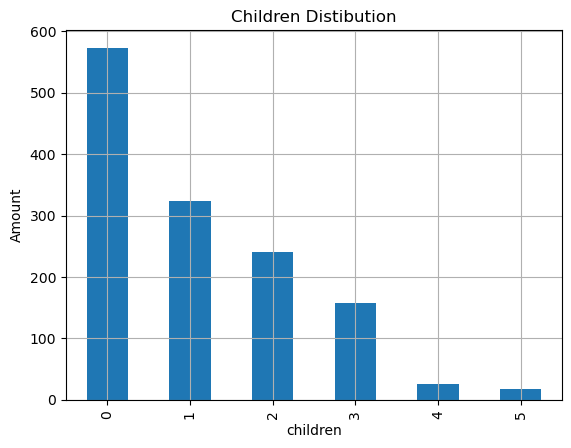

In [ ]:
#Checking the unique values to present normal distribution
df["children"].value_counts().plot(kind = "bar", title = "Children Distibution")
plt.grid()
plt.ylabel("Amount")

Text(0, 0.5, 'Amount')

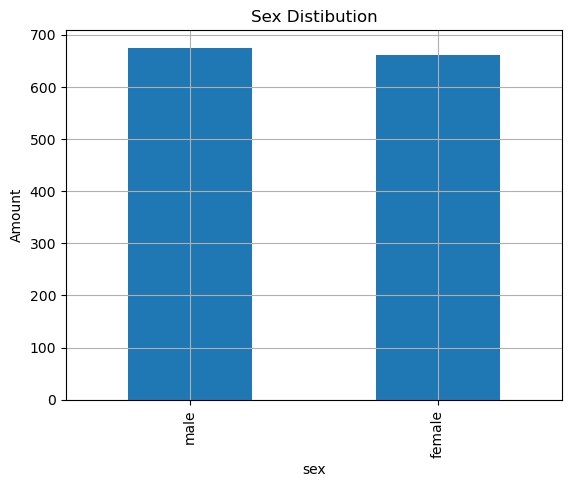

In [ ]:
df["sex"].value_counts().plot(kind = "bar", title = "Sex Distibution")
plt.grid()
plt.ylabel("Amount")

Text(0, 0.5, 'Amount')

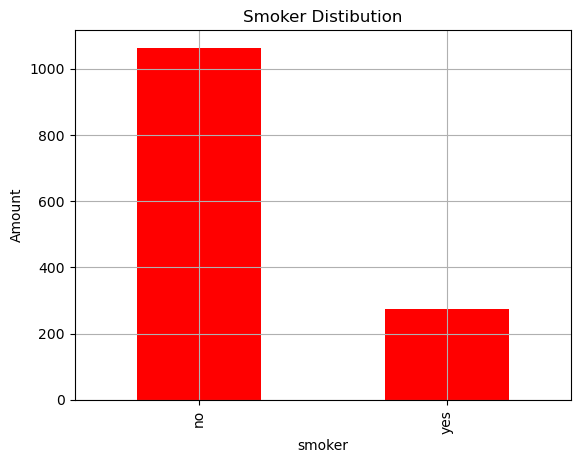

In [ ]:
df["smoker"].value_counts().plot(kind = "bar", title = "Smoker Distibution", color = "r")
plt.grid()
plt.ylabel("Amount")

Text(0, 0.5, 'Amount')

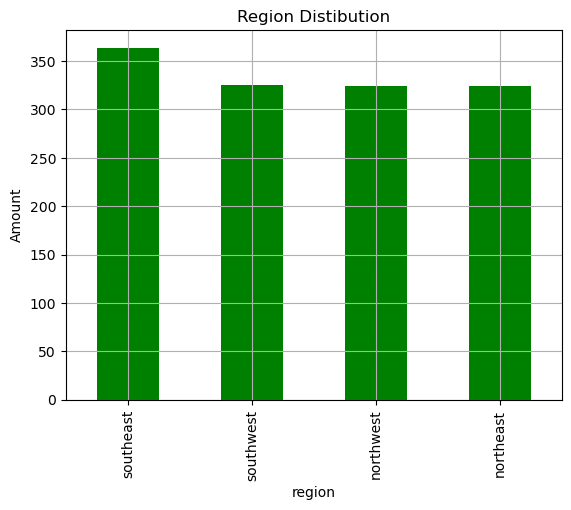

In [ ]:
df["region"].value_counts().plot(kind = "bar", title = "Region Distibution", color = "g")
plt.grid()
plt.ylabel("Amount")

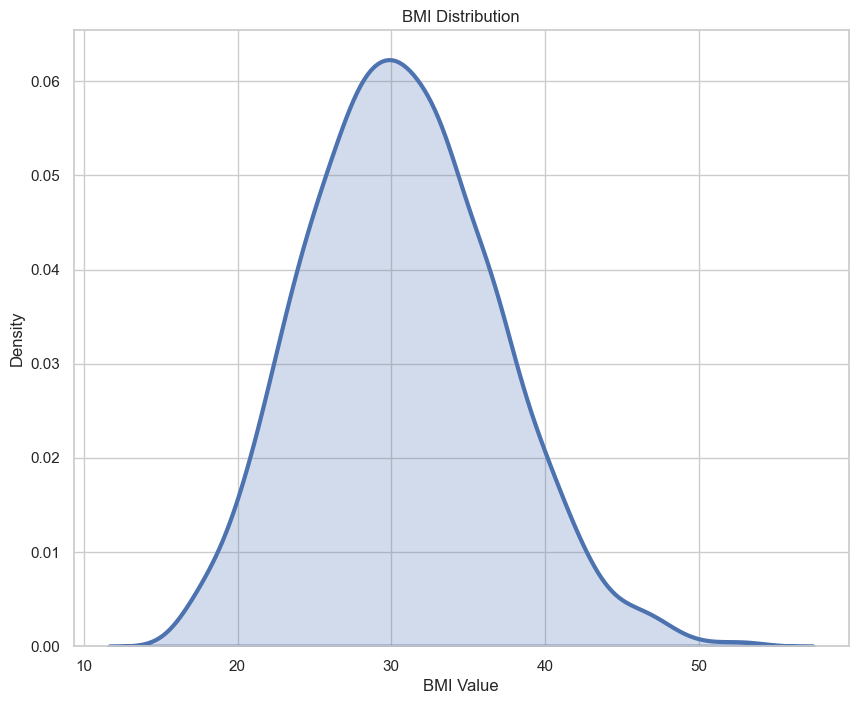

In [ ]:
#Understanding BMI visualisation
sns.set(style="whitegrid")
plt.figure(figsize = (10,8))
sns.kdeplot(df["bmi"],fill =True, palette="viridis",linewidth =3)
plt.title("BMI Distribution")
plt.xlabel("BMI Value")
plt.savefig("BMI_plot.png", dpi = 600)
plt.show()

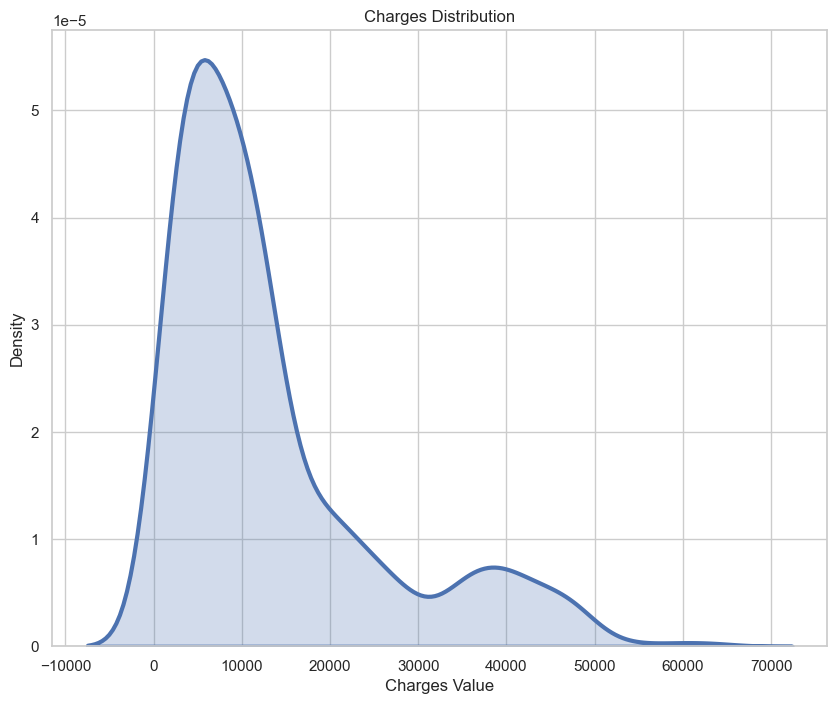

In [ ]:
#Understanding charges visualisation
sns.set(style="whitegrid")
plt.figure(figsize = (10,8))
sns.kdeplot(df["charges"],fill =True, palette="viridis",linewidth =3)
plt.title("Charges Distribution")
plt.xlabel("Charges Value")
plt.savefig("Charges_plot.png", dpi = 600)
plt.show()

In [ ]:
df1=df.iloc[:,:]

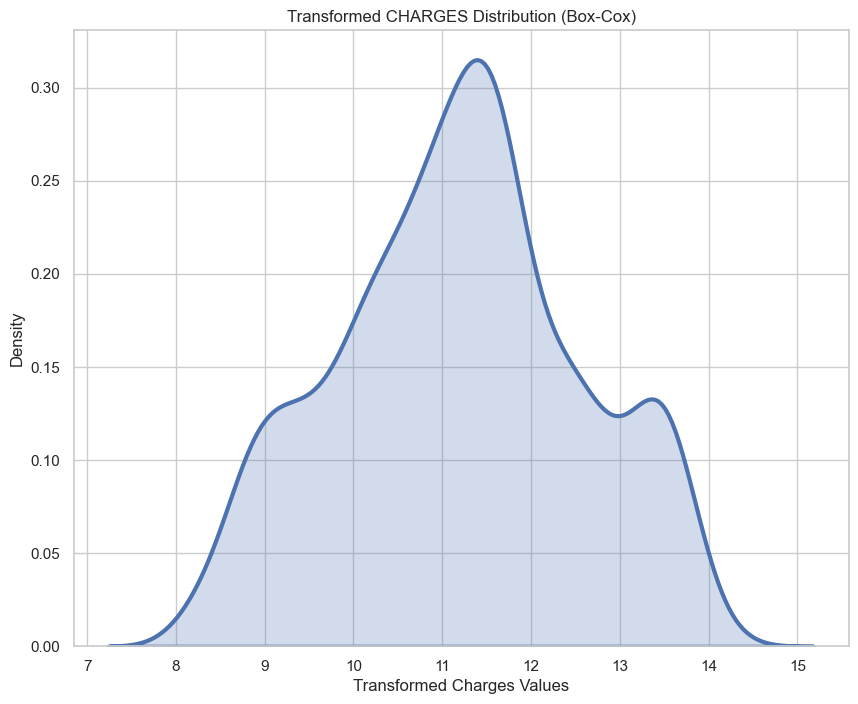

In [ ]:
from scipy import stats
# Apply Box-Cox transformation
transformed_charges, lambda_value = stats.boxcox(df1["charges"])

# Plot the transformed distribution
plt.figure(figsize=(10, 8))
sns.kdeplot(transformed_charges, fill=True, palette="viridis", linewidth=3)
plt.title("Transformed CHARGES Distribution (Box-Cox)")
plt.xlabel("Transformed Charges Values")
plt.savefig("Transformed_Charges_plot.png", dpi=500)
plt.show()

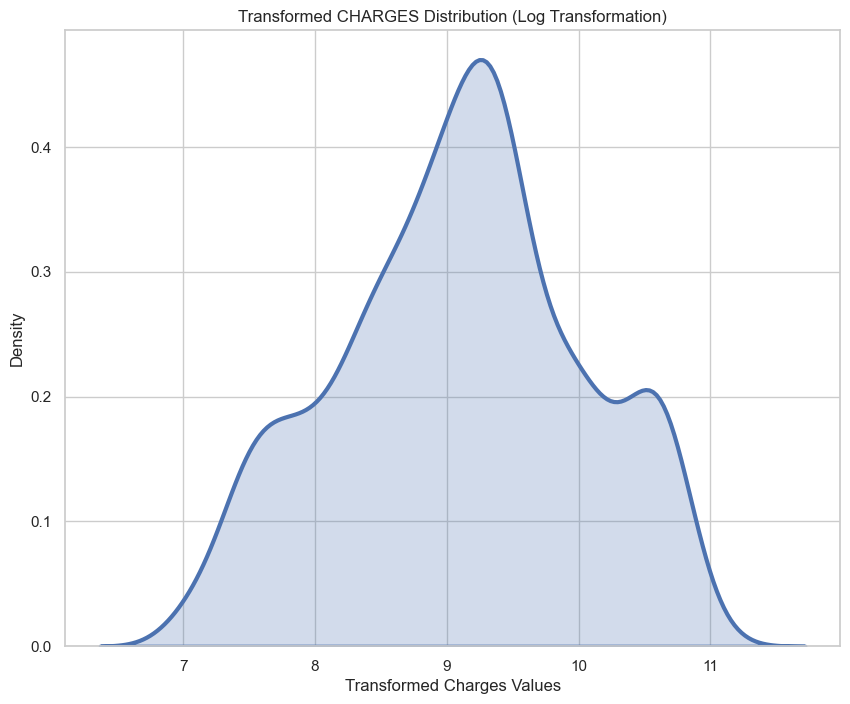

In [ ]:
logData = np.log(df1['charges'] + 1)
#Understanding BMI visualisation
sns.set(style="whitegrid")
plt.figure(figsize = (10,8))
sns.kdeplot(logData,fill =True, palette="viridis",linewidth =3)
plt.title("Transformed CHARGES Distribution (Log Transformation)")
plt.xlabel("Transformed Charges Values")
plt.savefig("Log_Transformed_Charges_plot.png", dpi = 600)
plt.show()

# Correlation application

In [ ]:
df2=df1.iloc[:,:]

## Label Encoding

In [ ]:

my_label = preprocessing.LabelEncoder()

df2[ 'sex' ]= my_label.fit_transform(df2[ 'sex' ])
print(df2[ 'sex' ].unique())
print("Data Frame after Label Encoding:\n")


[0 1]
Data Frame after Label Encoding:



In [ ]:
from sklearn.preprocessing import LabelEncoder as label_encoder
from sklearn import preprocessing
my_label = preprocessing.LabelEncoder()

df2[ 'smoker' ]= my_label.fit_transform(df2[ 'smoker' ])
print(df2[ 'smoker' ].unique())
print("Data Frame after Label Encoding:\n")


[1 0]
Data Frame after Label Encoding:



In [ ]:
from sklearn.preprocessing import LabelEncoder as label_encoder
from sklearn import preprocessing
my_label = preprocessing.LabelEncoder()

df2[ 'region' ]= my_label.fit_transform(df2[ 'region' ])
print(df2[ 'region' ].unique())
print("Data Frame after Label Encoding:\n")


[3 2 1 0]
Data Frame after Label Encoding:



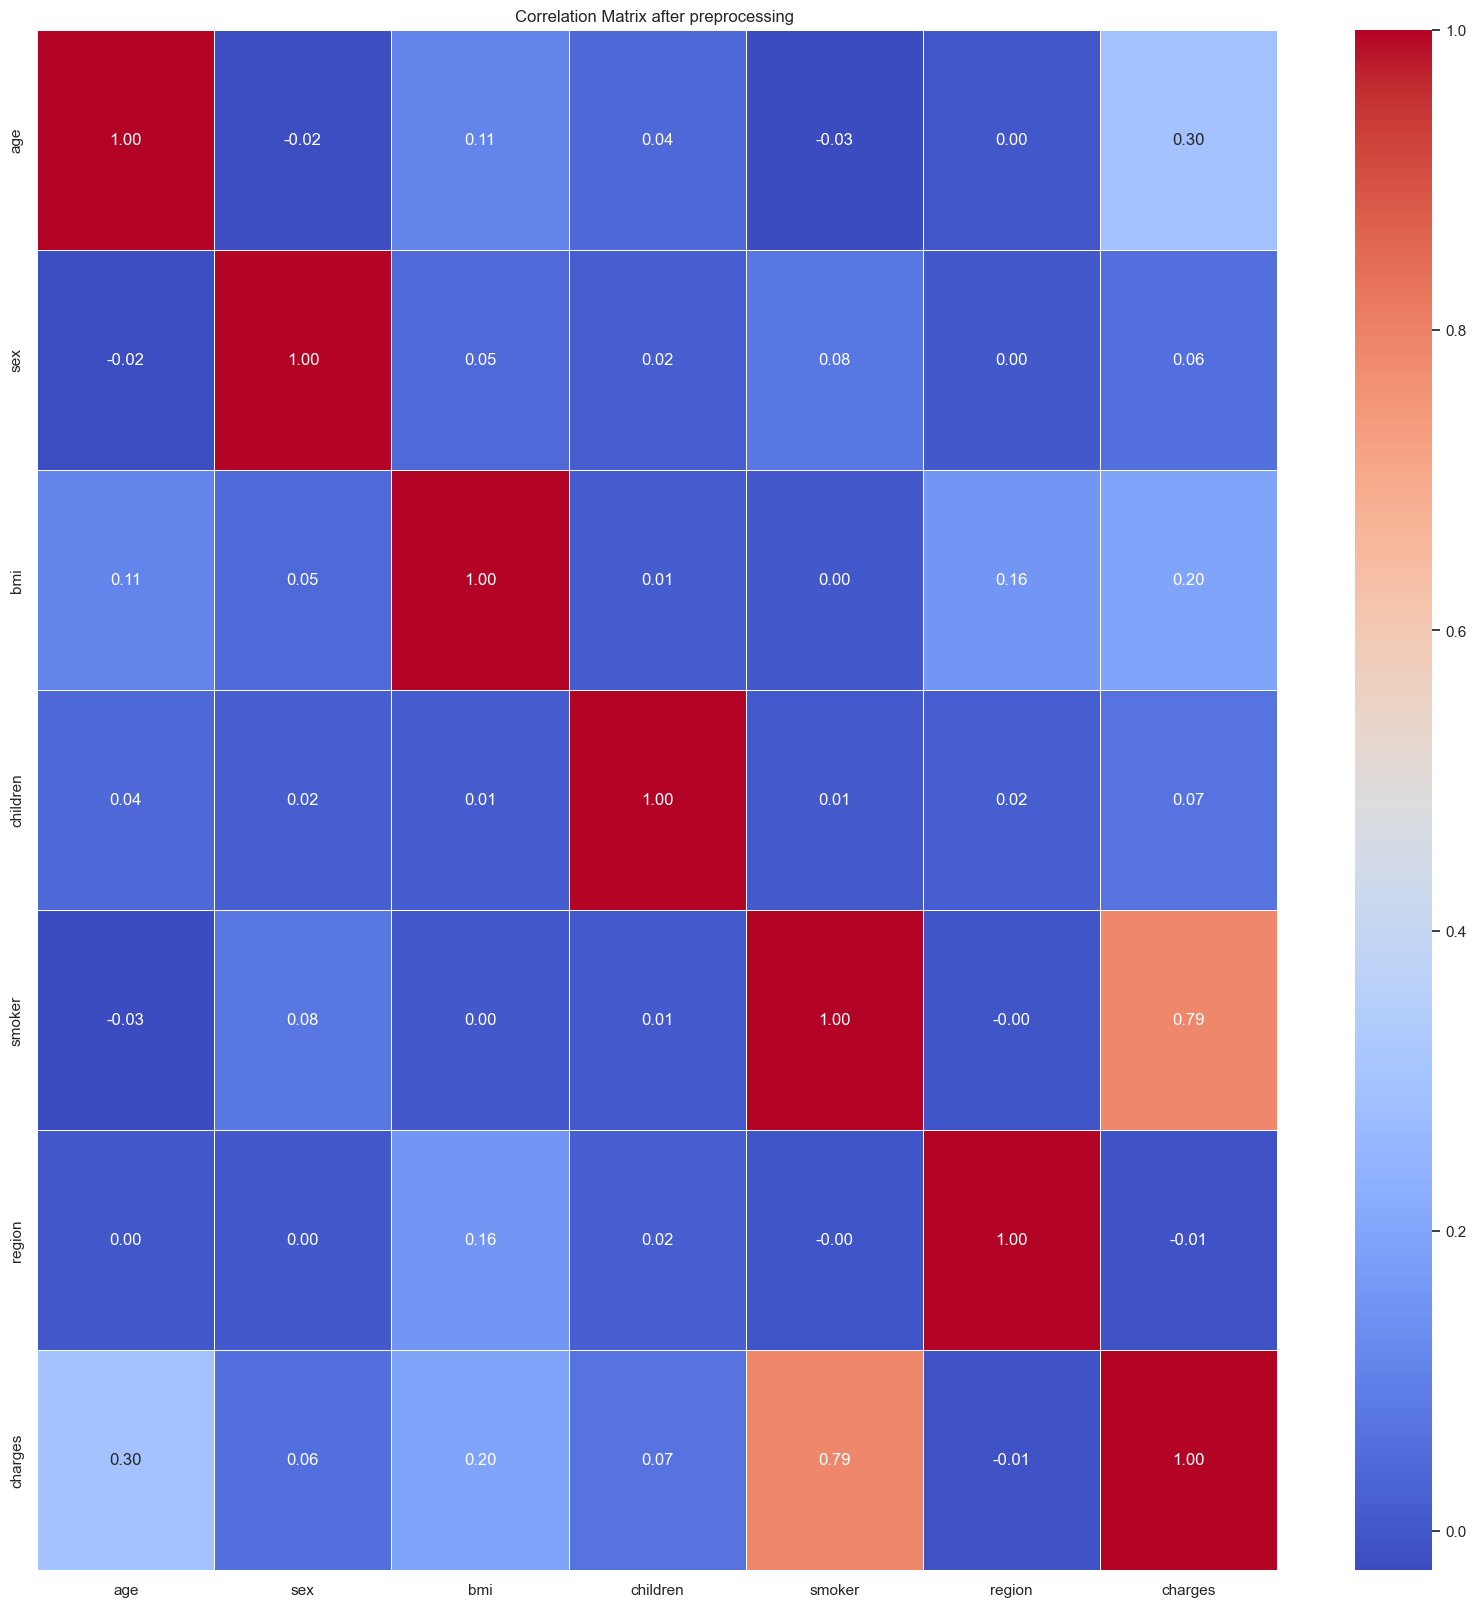

In [ ]:
corrMat = df2.corr(method='pearson') #correlation calculation
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrMat, annot=True, fmt='.2f', ax=ax, cmap='coolwarm', linewidth = 0.5) # base on the heatmap
plt.title("Correlation Matrix after preprocessing ")
plt.show()

# Visualising plots

<Axes: xlabel='smoker', ylabel='charges'>

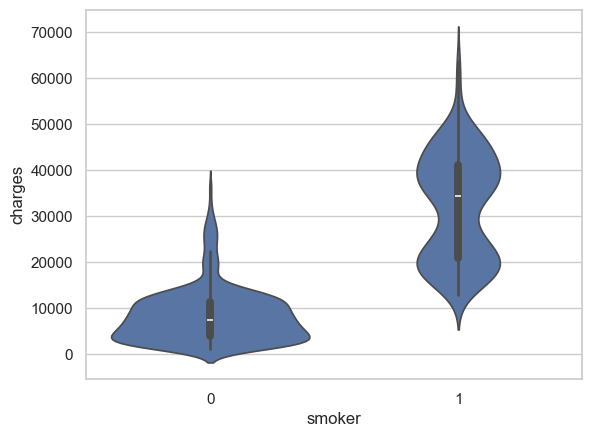

In [ ]:
sns.violinplot(x = 'smoker', y = 'charges', data = df2)

<Axes: xlabel='sex', ylabel='charges'>

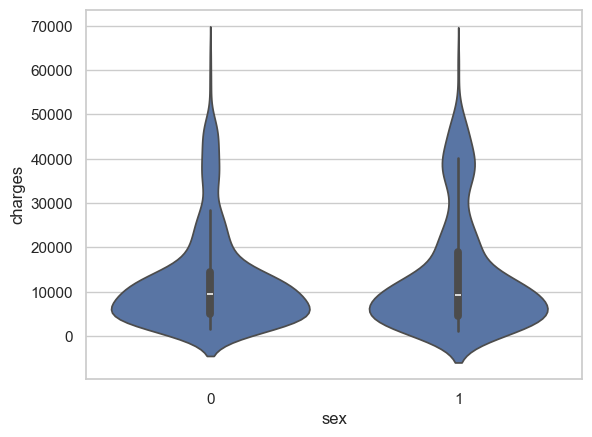

In [ ]:
sns.violinplot(x = 'sex', y = 'charges', data = df2)

<Axes: xlabel='region', ylabel='charges'>

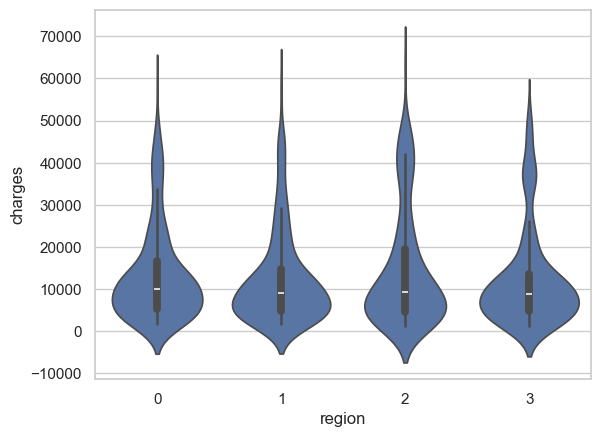

In [ ]:
sns.violinplot(x = 'region', y = 'charges', data = df2)

<Axes: xlabel='smoker', ylabel='bmi'>

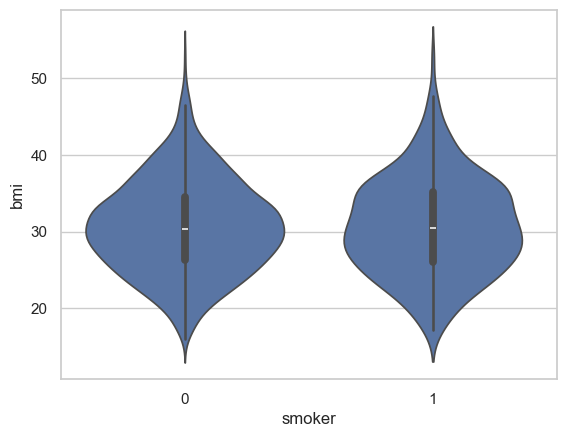

In [ ]:
sns.violinplot(x = 'smoker', y = 'bmi', data = df2)

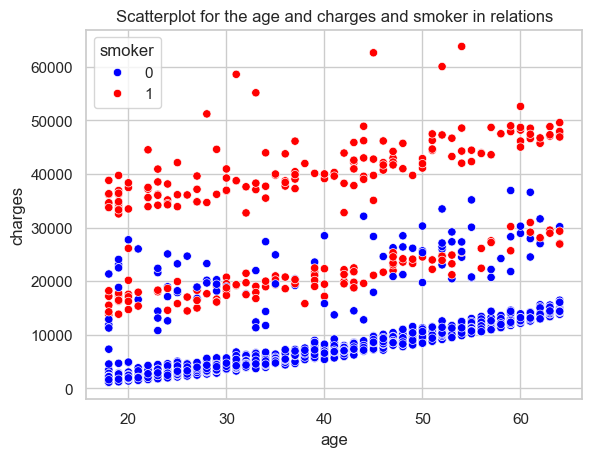

In [ ]:
sns.scatterplot(x = 'age', y ='charges', hue = 'smoker', data = df2, palette = {1: 'red', 0: 'blue'})
plt.title("Scatterplot for the age and charges and smoker in relations")
plt.show()

In [ ]:
df2.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Label Encoder generalised code

In [ ]:
insurance_df = df.iloc[:,:]

In [ ]:
from sklearn.preprocessing import LabelEncoder

mask = insurance_df.dtypes == np.object_
Category_column = insurance_df.columns[mask]

le = LabelEncoder()

for category in Category_column:
    le.fit(insurance_df[category].drop_duplicates())
    insurance_df[category]=le.transform(insurance_df[category])

insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [ ]:
X = insurance_df.drop(["charges","region"], axis = 1)
y = insurance_df.charges

In [ ]:
kf = KFold(shuffle = True, random_state = True, n_splits = 3)

# Linear Regression

In [ ]:
estimator = Pipeline([("Scaler", StandardScaler()), ("Polynomial_Features", PolynomialFeatures()), ("Linear_Regression", LinearRegression())])

params = {"Polynomial_Features__degree":range(3), }

grid = GridSearchCV(estimator, params, cv = kf)
grid.fit(X,y)
grid.best_score_ , grid.best_params_

(0.838526001872746, {'Polynomial_Features__degree': 2})

In [ ]:
Vanilla_Regression = Pipeline([("Scaler", StandardScaler()), ("Polynomial_Features", PolynomialFeatures()), ("Linear_Regression", LinearRegression())])
Vanilla_Regression.fit(X,y)
print(f"The accuracy is : {round(Vanilla_Regression.score(X,y)*100,2)} %")

The accuracy is : 84.39 %


# Lasso Regression

In [ ]:
estimator = Pipeline([("Scaler", StandardScaler()), ("Polynomial_Features", PolynomialFeatures()), ("Lasso_Regression", Lasso())])

params = {"Polynomial_Features__degree": [1,2,3],
          "Lasso_Regression__alpha": np.geomspace(0.01,30,20),
          }

grid = GridSearchCV(estimator, params, cv = kf)
grid.fit(X,y)
grid.best_score_ , grid.best_params_

(0.8390194953904698,
 {'Lasso_Regression__alpha': 30.0, 'Polynomial_Features__degree': 3})

In [ ]:
Lasso_Regression = Pipeline([("Scaler", StandardScaler()), ("make_higher_degree", PolynomialFeatures()), ("Lasso_Regression", Lasso())])
Lasso_Regression.fit(X,y)
print(f"The accuracy is : {round(Lasso_Regression.score(X,y)*100,2)} %")

The accuracy is : 84.39 %


# Ridge Regression

In [ ]:
estimator = Pipeline([("Scaler", StandardScaler()), ("Polynomial_Features", PolynomialFeatures()), ("Ridge_Regression", Ridge())])

params = {"Polynomial_Features__degree": [1,2,3],
          "Ridge_Regression__alpha": np.geomspace(0.01,30,20),
          }

grid = GridSearchCV(estimator, params, cv = kf)
grid.fit(X,y)
grid.best_score_ , grid.best_params_

(0.8385635132575003,
 {'Polynomial_Features__degree': 2,
  'Ridge_Regression__alpha': 8.474266336094622})

In [ ]:
Ridge_Regression = Pipeline([("Scaler", StandardScaler()), ("make_higher_degree", PolynomialFeatures()), ("Ridge_Regression", Ridge())])
Ridge_Regression.fit(X,y)
print(f"The accuracy is : {round(Ridge_Regression.score(X,y)*100,2)} %")

The accuracy is : 84.39 %


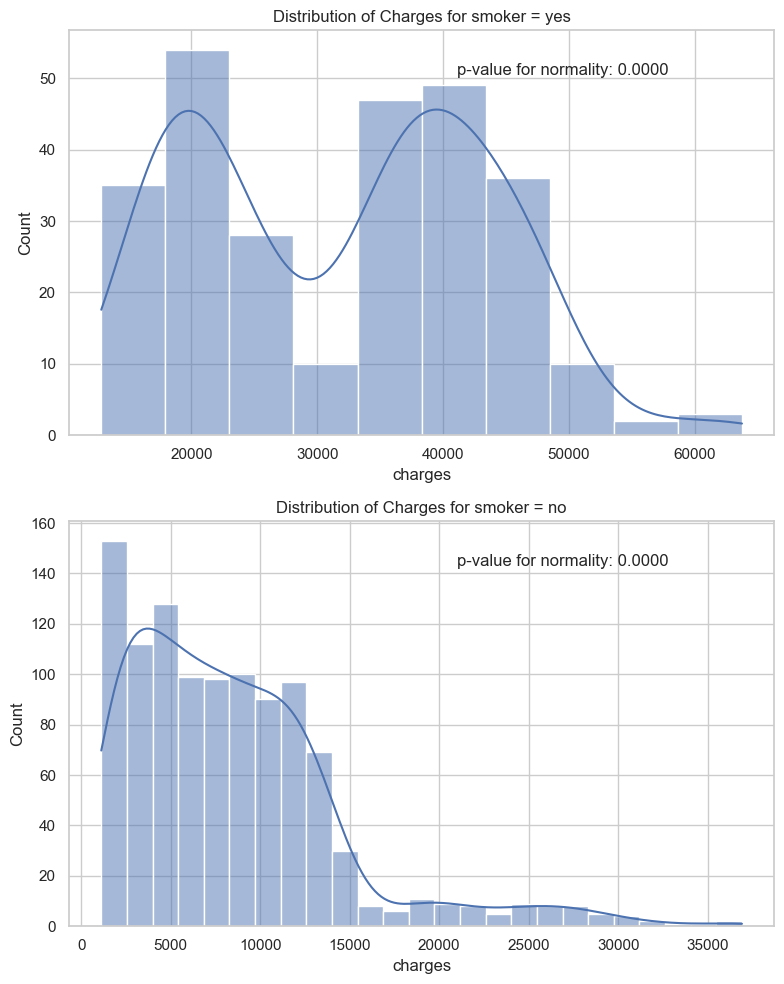

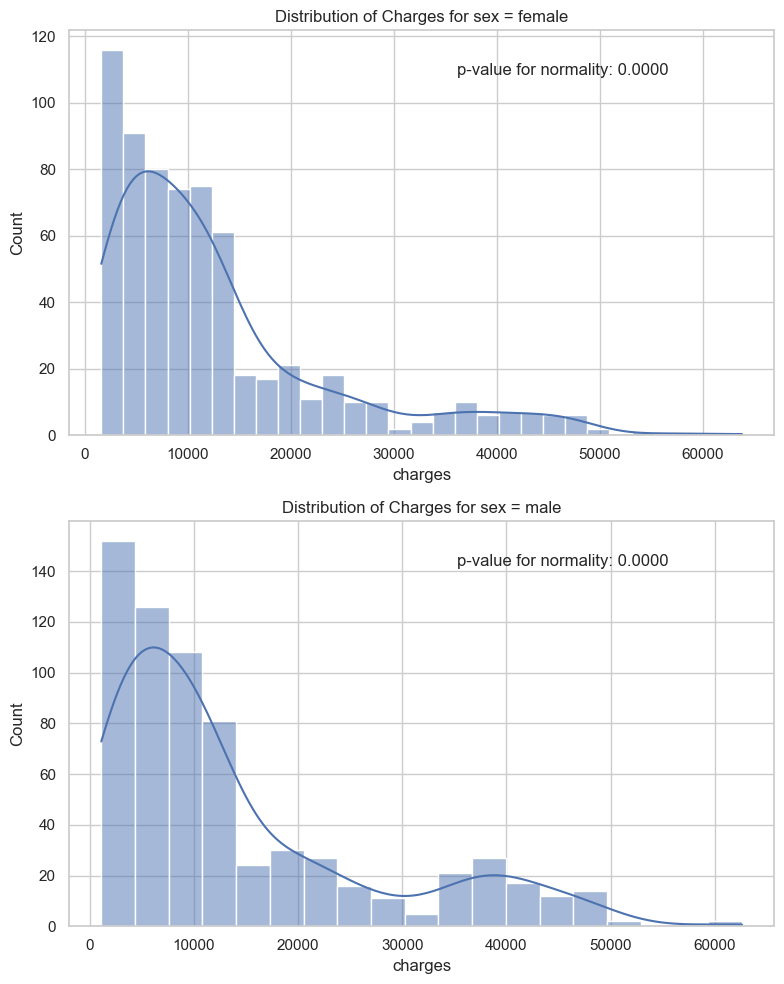

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

def plot_distribution_and_test_normality(df, group_by=None):
    if group_by:
        groups = df[group_by].unique()
        fig, axes = plt.subplots(len(groups), 1, figsize=(8, 5 * len(groups)))
        if len(groups) == 1:
            axes = [axes]
        for ax, group in zip(axes, groups):
            subset = df[df[group_by] == group]['charges']
            sns.histplot(subset, kde=True, ax=ax)
            ax.set_title(f'Distribution of Charges for {group_by} = {group}')
            stat, p = shapiro(subset)
            ax.text(s=f'p-value for normality: {p:.4f}', x=0.7, y=0.9, ha='center', va='center', transform=ax.transAxes)
    else:
        sns.histplot(data['charges'], kde=True)
        plt.title('Overall Distribution of Charges')
        stat, p = shapiro(df['charges'])
        plt.text(s=f'p-value for normality: {p:.4f}', x=0.7, y=0.9, ha='center', va='center', transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.show()

plot_distribution_and_test_normality(df, 'smoker')
plot_distribution_and_test_normality(df, 'sex')


In [ ]:
from scipy.stats import ttest_ind

smoker_charges = df[df['smoker'] == 'yes']['charges']
nonsmoker_charges = df[df['smoker'] == 'no']['charges']
t_stat_smoker, p_value_smoker = ttest_ind(smoker_charges, nonsmoker_charges, equal_var=False)

male_charges = df[df['sex'] == 'male']['charges']
female_charges = df[df['sex'] == 'female']['charges']
t_stat_sex, p_value_sex = ttest_ind(male_charges, female_charges, equal_var=False)

(t_stat_smoker, p_value_smoker), (t_stat_sex, p_value_sex)


((32.7423097372529, 6.261720774727631e-103),
 (2.1275372170149476, 0.033561547636765776))

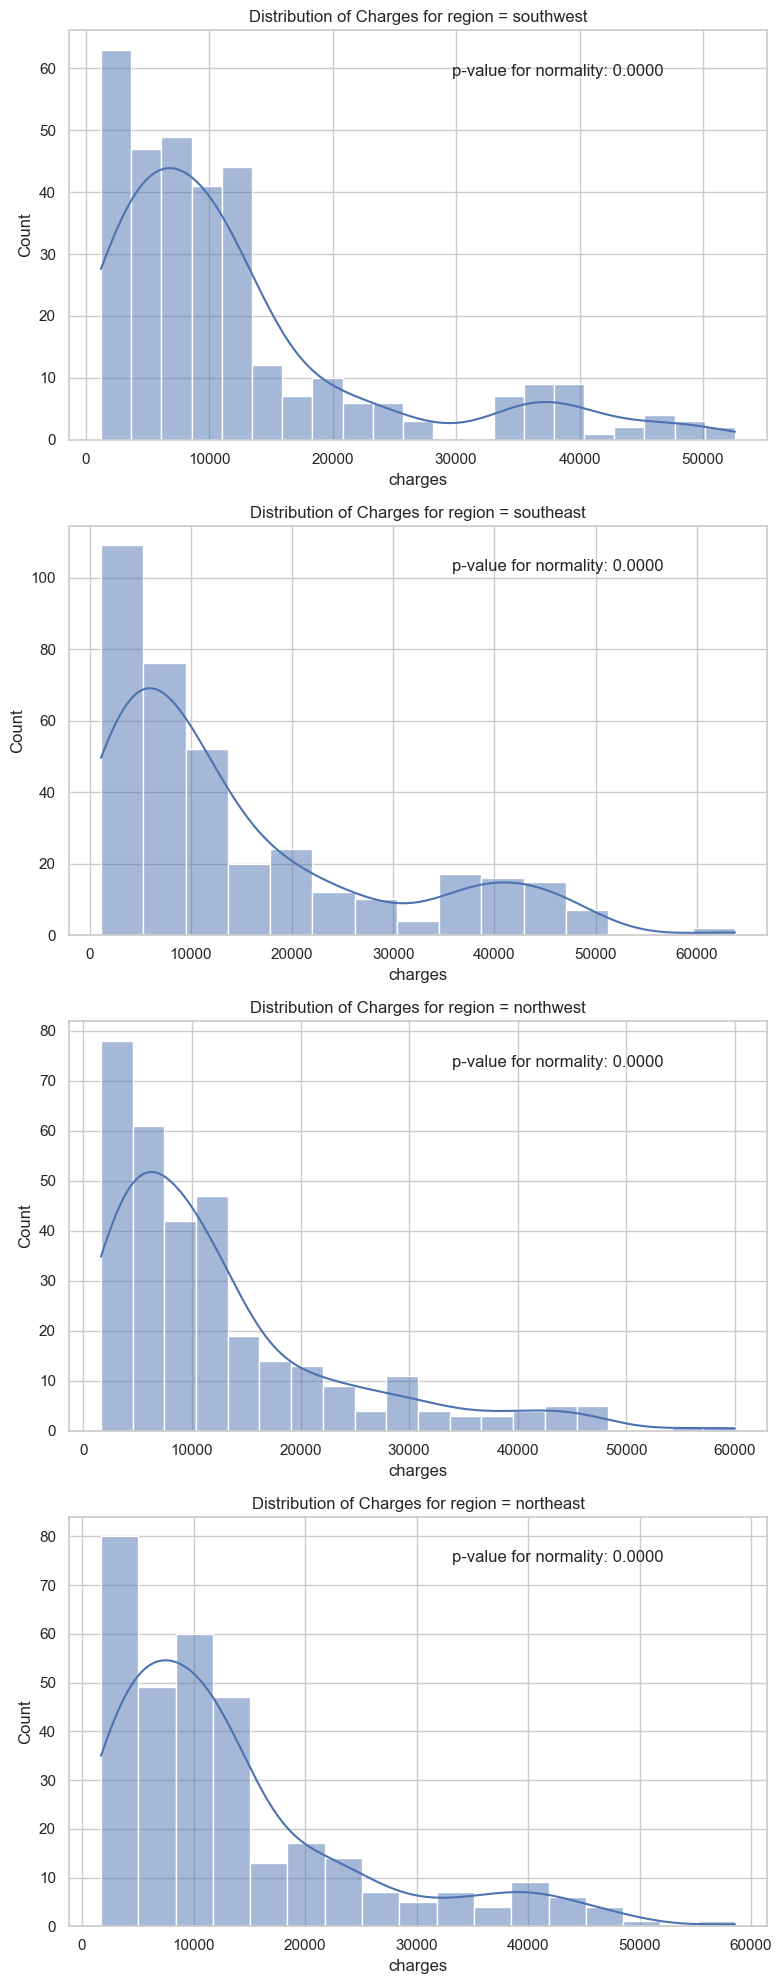

In [ ]:
plot_distribution_and_test_normality(df, 'region')
